# Environment Setup

In [ ]:
!pip install pycaret -q

     |████████████████████████████████| 266 kB 5.1 MB/s 
     |████████████████████████████████| 111 kB 58.0 MB/s 
     |████████████████████████████████| 6.8 MB 58.0 MB/s 
     |████████████████████████████████| 271 kB 62.5 MB/s 
     |████████████████████████████████| 1.3 MB 62.6 MB/s 
     |████████████████████████████████| 80 kB 10.2 MB/s 
     |████████████████████████████████| 167 kB 49.1 MB/s 
     |████████████████████████████████| 14.6 MB 110 kB/s 
     |████████████████████████████████| 261 kB 60.9 MB/s 
     |████████████████████████████████| 1.7 MB 60.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 66.4 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 10.1 MB 19.0 MB/s 
     |████████████████████████████████| 102 kB 11.9 MB/s 
     |████████████████

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

     | 34.6 MB 668 kB/s
     |████████████████████████████████| 4.7 MB 5.2 MB/s 


In [ ]:
import numpy as np
import pandas as pd

from pycaret.classification import *
from pandas_profiling import ProfileReport
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
# running this fixed the plots not displaying
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
plt.close('all')

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#profile = ProfileReport(dataset, title="Heart Dataset", html={'style': {'full_width': True}})
#profile.to_notebook_iframe()
#profile.to_file(output_file="Heart_UCI_Profile.html")

# Data Import/Setup

In [ ]:
df_path = 'gdrive/My Drive/Colab Notebooks/heart_cleveland_upload.csv'  #change dir to your project folder
dataset = pd.read_csv(df_path)
dataset.shape

(297, 14)

In [ ]:
data = dataset.sample(frac=0.90, random_state=54321)
data_unseen = dataset.drop(data.index)

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (267, 14)
Unseen Data For Predictions (30, 14)


In [ ]:
data.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,62,0,3,150,244,0,0,154,1,1.4,1,0,0,1


In [ ]:
#data.drop('fbs', axis=1, inplace=True)
#data.head(1)

Notes for Setup:<br>
Need explanations for parameter settings:<br>
pca:<br>
pca_components:<br>
normalize:<br>
transofrmation:<br>
remove_multicollinearity:<br>
multicollinearity_threshold:<br>
bin_numeric_features:<br>
<br>
OTHERS as they are changed

In [ ]:
exp_clf102 = setup(
      data = data, 
      target = 'condition', 
#     feature_selection = True,
#     feature_selection_threshold = .5,
      pca = True, 
      pca_components = .999, 
      combine_rare_levels = True, 
      rare_level_threshold = 0.05,

      normalize = True, 
      transformation = True, 
      remove_multicollinearity = True, 
      multicollinearity_threshold = 0.70,
      bin_numeric_features = ['age'],
      #profile=True,
      silent=True,
      train_size = 0.9,
      log_experiment = True,
      experiment_name = 'P1_Heart',
      session_id=123)

,Description,Value
0,session_id,123
1,Target,condition
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(267, 14)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


# Compare models

In [ ]:
#Compare models common parameters 
NUM_FOLDS = 10
OPTIMIZE_FOR = 'Accuracy'

In [ ]:
top3 = compare_models(fold=NUM_FOLDS,n_select=3,sort=OPTIMIZE_FOR)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8375,0.9063,0.8091,0.8451,0.8152,0.6713,0.6858,0.285
ridge,Ridge Classifier,0.8292,0.0000,0.7636,0.8632,0.8009,0.6531,0.6672,0.013
lda,Linear Discriminant Analysis,0.8250,0.8930,0.7636,0.8483,0.7976,0.6448,0.6541,0.017
rf,Random Forest Classifier,0.8125,0.8745,0.7364,0.8480,0.7801,0.6187,0.6323,0.494
et,Extra Trees Classifier,0.8042,0.8839,0.7182,0.8425,0.7682,0.6012,0.6137,0.462
lightgbm,Light Gradient Boosting Machine,0.8000,0.8720,0.7364,0.8268,0.7710,0.5948,0.6070,0.077
gbc,Gradient Boosting Classifier,0.7958,0.8427,0.7455,0.8036,0.7684,0.5868,0.5938,0.168
ada,Ada Boost Classifier,0.7833,0.8490,0.7182,0.7944,0.7504,0.5603,0.5670,0.112
knn,K Neighbors Classifier,0.7792,0.8360,0.6909,0.8062,0.7404,0.5505,0.5587,0.118
svm,SVM - Linear Kernel,0.7708,0.0000,0.7636,0.7634,0.7552,0.5405,0.5517,0.014


# Model 1

In [ ]:
model1 = top3[0]
print(model1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
evaluate_model(model1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
tuned_model1=tune_model(model1, optimize=OPTIMIZE_FOR,fold=NUM_FOLDS)
print(tuned_model1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,0.9301,0.8182,0.8182,0.8182,0.6643,0.6643
1,0.7917,0.9510,0.6364,0.8750,0.7368,0.5714,0.5913
2,0.8750,0.9510,0.8182,0.9000,0.8571,0.7465,0.7492
3,0.7917,0.8252,0.5455,1.0000,0.7059,0.5652,0.6276
4,0.8333,0.8741,0.7273,0.8889,0.8000,0.6596,0.6693
5,0.7917,0.8392,0.6364,0.8750,0.7368,0.5714,0.5913
6,0.8333,0.8811,0.8182,0.8182,0.8182,0.6643,0.6643
7,0.9583,0.9860,0.9091,1.0000,0.9524,0.9155,0.9188
8,0.7917,0.8601,0.7273,0.8000,0.7619,0.5775,0.5795
9,0.8750,0.9301,0.8182,0.9000,0.8571,0.7465,0.7492


LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
evaluate_model(tuned_model1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

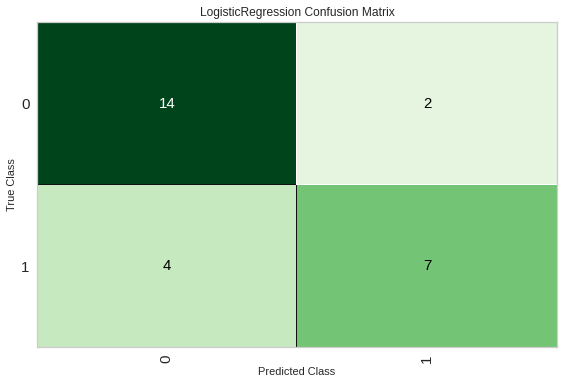

In [ ]:
plot_model(tuned_model1, plot='confusion_matrix')

In [ ]:
calibrated_model1 = calibrate_model(tuned_model1)
evaluate_model(calibrated_model1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,0.9301,0.8182,0.8182,0.8182,0.6643,0.6643
1,0.7917,0.9510,0.6364,0.8750,0.7368,0.5714,0.5913
2,0.8750,0.9510,0.8182,0.9000,0.8571,0.7465,0.7492
3,0.7917,0.8252,0.5455,1.0000,0.7059,0.5652,0.6276
4,0.8333,0.8741,0.7273,0.8889,0.8000,0.6596,0.6693
5,0.7917,0.8392,0.6364,0.8750,0.7368,0.5714,0.5913
6,0.8333,0.8811,0.8182,0.8182,0.8182,0.6643,0.6643
7,0.9583,0.9860,0.9091,1.0000,0.9524,0.9155,0.9188
8,0.7917,0.8601,0.7273,0.8000,0.7619,0.5775,0.5795
9,0.8333,0.9301,0.8182,0.8182,0.8182,0.6643,0.6643


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

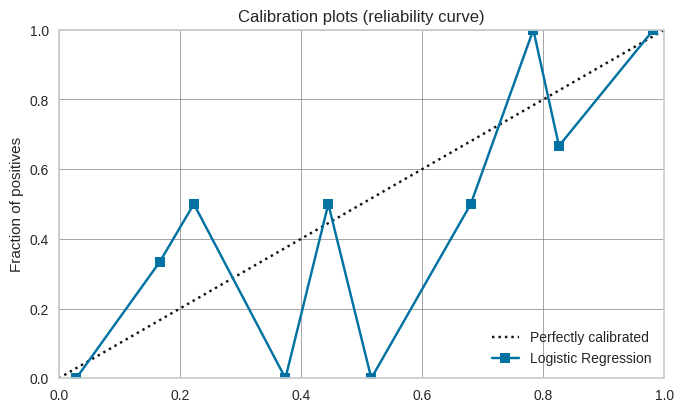

In [ ]:
plot_model(calibrated_model1,plot='calibration')

In [ ]:
bagged_model1 = ensemble_model(calibrated_model1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7917,0.9301,0.7273,0.8000,0.7619,0.5775,0.5795
1,0.7917,0.9441,0.6364,0.8750,0.7368,0.5714,0.5913
2,0.8750,0.9510,0.8182,0.9000,0.8571,0.7465,0.7492
3,0.7917,0.8322,0.5455,1.0000,0.7059,0.5652,0.6276
4,0.8333,0.8811,0.7273,0.8889,0.8000,0.6596,0.6693
5,0.7917,0.8462,0.6364,0.8750,0.7368,0.5714,0.5913
6,0.8333,0.8741,0.8182,0.8182,0.8182,0.6643,0.6643
7,0.9583,0.9720,0.9091,1.0000,0.9524,0.9155,0.9188
8,0.7917,0.8601,0.7273,0.8000,0.7619,0.5775,0.5795
9,0.8750,0.9301,0.8182,0.9000,0.8571,0.7465,0.7492


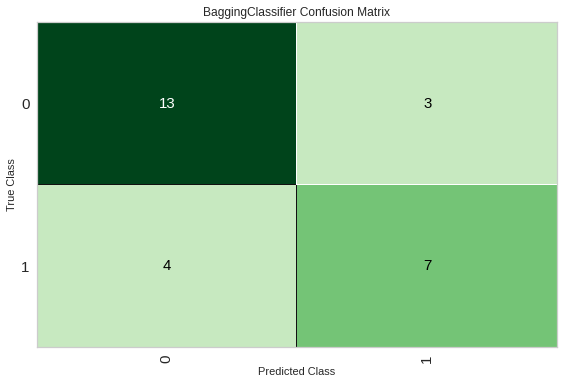

In [ ]:
plot_model(bagged_model1, plot='confusion_matrix')

In [ ]:
#boosted_model1 = ensemble_model(model1,method = 'Boosting')

In [ ]:
#plot_model(boosted_model1, plot='confusion_matrix')

In [ ]:
predict_model(calibrated_model1)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7407,0.8295,0.6364,0.7,0.6667,0.4553,0.4567


,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,Component_11,Component_12,Component_13,Component_14,Component_15,Component_16,Component_17,Component_18,Component_19,Component_20,Component_21,Component_22,Component_23,Component_24,Component_25,Component_26,Component_27,condition,Label,Score
0,2.234768,-0.838553,1.463578,-1.866701,-0.082001,0.236553,0.014871,0.372177,-0.272505,0.435391,1.257528,0.085650,0.636312,-0.045663,0.100303,-0.108095,0.281098,-0.345637,0.139830,-0.361998,-0.444280,0.145425,-0.362688,0.553918,-0.257427,-0.088238,0.071905,1,1,0.9378
1,-0.990624,-0.108980,-1.669463,-0.428861,-0.796538,0.381384,0.531897,0.098449,-0.474044,0.183795,-0.649631,-0.081896,0.126326,-0.339937,-0.016249,-0.706383,0.123789,-0.059411,-0.212988,-0.629621,0.041202,0.093404,-0.009423,-0.002909,-0.116011,-0.041359,-0.015203,1,0,0.5734
2,1.718231,-0.039964,0.671212,-0.092768,1.656215,-0.485361,0.024627,-0.018149,0.315170,0.591457,-0.013065,-0.460687,0.101487,-0.512974,0.595184,0.345434,0.333519,0.672632,-0.199868,-0.040475,0.464518,0.777842,0.060731,-0.576905,-0.099086,-0.085118,0.037688,0,1,0.5075
3,-0.263818,-1.896513,-1.138725,1.001249,0.863246,0.116377,-0.451131,-0.295994,0.025316,-0.420443,-0.225413,0.412675,-0.295773,0.357966,0.580375,-0.169865,-0.281009,0.136716,0.614850,0.340382,-0.117683,-0.088650,-0.089171,0.029238,0.096984,0.000485,-0.031188,0,0,0.7729
4,2.758751,-0.815390,0.589802,0.356621,0.237520,-0.602686,-0.932626,0.145678,0.710209,-0.076677,-0.210006,0.278621,0.302728,0.082414,0.023291,-0.210209,0.110383,0.078939,-0.200065,0.154560,-0.204203,0.502459,0.197008,-0.438010,0.004825,-0.057385,0.073998,1,1,0.9218
5,-1.839751,-2.406875,1.106332,0.930546,0.671772,-0.018949,0.335530,0.260713,0.255025,-0.591351,0.337301,-0.625480,-0.269271,-0.069451,0.181854,-0.596396,-0.583309,0.046832,-0.295218,-0.256016,0.304494,-0.148865,-0.207340,-0.155340,0.012028,-0.023588,0.027207,0,0,0.9358
6,-1.116049,0.401142,0.392006,0.648277,0.272631,-0.312717,0.344199,0.881214,0.077128,0.607655,0.091183,-0.343932,-0.580695,0.038231,0.212937,-0.377184,-0.659490,-0.188010,-0.403235,-0.278953,0.125336,-0.191243,-0.167140,-0.085922,-0.008763,-0.061884,0.004933,0,0,0.8775
7,-1.543736,1.188275,0.408261,0.059537,-0.912812,-0.697459,0.233092,0.153686,-0.703326,-0.599802,-0.560485,0.784612,-0.218088,0.189798,0.516065,-0.105278,-0.146697,0.098501,0.448361,0.242030,-0.157486,-0.015484,-0.028356,0.051606,0.261212,0.026732,-0.053708,0,0,0.8043
8,1.577546,-0.378590,-0.842277,-0.730178,1.097575,0.820030,0.210947,-0.762058,0.409243,-0.027044,0.108481,-0.597425,-0.680222,0.002013,-0.900042,0.134913,-0.139926,0.269491,0.000402,-0.328113,-0.076770,0.068967,-0.017183,-0.062176,-0.253824,-0.039444,0.013177,1,1,0.7750
9,-2.154423,-1.411286,-0.477335,-0.006458,-0.295191,0.453379,0.772932,-0.126476,0.935784,0.308142,-0.235500,-0.314153,-0.561336,-0.110477,0.077101,0.694084,0.233000,-0.638265,-0.261969,-0.161816,0.145852,0.152670,-0.150759,-0.174344,-0.061204,-0.055992,-0.042243,0,0,0.8999


In [ ]:
results_model1 = predict_model(bagged_model1, data=data_unseen)
display(results_model1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition,Label,Score
0,59,1,0,170,288,0,2,159,0,0.2,1,0,2,1,0,0.5798
1,66,1,1,160,246,0,0,120,1,0.0,1,3,1,1,1,0.7411
2,59,1,1,140,221,0,0,164,1,0.0,0,0,0,0,0,0.8236
3,56,1,1,120,236,0,0,178,0,0.8,0,0,0,0,0,0.8785
4,68,1,2,118,277,0,0,151,0,1.0,0,1,2,0,0,0.5236
5,67,0,2,152,277,0,0,172,0,0.0,0,1,0,0,0,0.8300
6,66,0,2,146,278,0,2,152,0,0.0,1,1,0,0,0,0.6958
7,59,1,2,126,218,1,0,134,0,2.2,1,1,1,1,1,0.7235
8,58,1,2,112,230,0,2,165,0,2.5,1,1,2,1,1,0.5995
9,50,1,2,129,196,0,0,163,0,0.0,0,0,0,0,0,0.9173


In [ ]:
holdout_score=pull()
display(holdout_score)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7407,0.8295,0.6364,0.7,0.6667,0.4553,0.4567


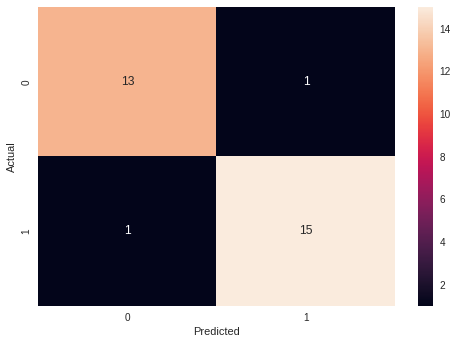

In [ ]:
confusion_matrix_m1 = pd.crosstab(results_model1['condition'], results_model1['Label'], rownames=['Actual'],colnames=['Predicted'])  #, margins=True)
sns.heatmap(confusion_matrix_m1, annot=True)
plt.show()

# Blend Models

In [ ]:
blend_soft = blend_models(estimator_list = [top3[0], top3[1], top3[2]])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7917,0.0,0.9091,0.7143,0.8000,0.5890,0.6078
1,0.8333,0.0,0.7273,0.8889,0.8000,0.6596,0.6693
2,0.8750,0.0,0.8182,0.9000,0.8571,0.7465,0.7492
3,0.7500,0.0,0.5455,0.8571,0.6667,0.4820,0.5136
4,0.8750,0.0,0.8182,0.9000,0.8571,0.7465,0.7492
5,0.8333,0.0,0.6364,1.0000,0.7778,0.6547,0.6976
6,0.7500,0.0,0.7273,0.7273,0.7273,0.4965,0.4965
7,0.9167,0.0,0.9091,0.9091,0.9091,0.8322,0.8322
8,0.8333,0.0,0.7273,0.8889,0.8000,0.6596,0.6693
9,0.8333,0.0,0.9091,0.7692,0.8333,0.6690,0.6783


In [ ]:
evaluate_model(blend_soft)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(blend_soft, data=data_unseen)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition,Label
0,59,1,0,170,288,0,2,159,0,0.2,1,0,2,1,0
1,66,1,1,160,246,0,0,120,1,0.0,1,3,1,1,1
2,59,1,1,140,221,0,0,164,1,0.0,0,0,0,0,0
3,56,1,1,120,236,0,0,178,0,0.8,0,0,0,0,0
4,68,1,2,118,277,0,0,151,0,1.0,0,1,2,0,0
5,67,0,2,152,277,0,0,172,0,0.0,0,1,0,0,0
6,66,0,2,146,278,0,2,152,0,0.0,1,1,0,0,0
7,59,1,2,126,218,1,0,134,0,2.2,1,1,1,1,0
8,58,1,2,112,230,0,2,165,0,2.5,1,1,2,1,1
9,50,1,2,129,196,0,0,163,0,0.0,0,0,0,0,0


In [ ]:
blend_hard = blend_models(estimator_list = [top3[0], top3[1], top3[2]], method='hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7917,0.0,0.9091,0.7143,0.8000,0.5890,0.6078
1,0.8333,0.0,0.7273,0.8889,0.8000,0.6596,0.6693
2,0.8750,0.0,0.8182,0.9000,0.8571,0.7465,0.7492
3,0.7500,0.0,0.5455,0.8571,0.6667,0.4820,0.5136
4,0.8750,0.0,0.8182,0.9000,0.8571,0.7465,0.7492
5,0.8333,0.0,0.6364,1.0000,0.7778,0.6547,0.6976
6,0.7500,0.0,0.7273,0.7273,0.7273,0.4965,0.4965
7,0.9167,0.0,0.9091,0.9091,0.9091,0.8322,0.8322
8,0.8333,0.0,0.7273,0.8889,0.8000,0.6596,0.6693
9,0.8333,0.0,0.9091,0.7692,0.8333,0.6690,0.6783


In [ ]:
evaluate_model(blend_hard)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
results_blendhard = predict_model(blend_hard, data=data_unseen)
display(results_blendhard)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition,Label
0,59,1,0,170,288,0,2,159,0,0.2,1,0,2,1,0
1,66,1,1,160,246,0,0,120,1,0.0,1,3,1,1,1
2,59,1,1,140,221,0,0,164,1,0.0,0,0,0,0,0
3,56,1,1,120,236,0,0,178,0,0.8,0,0,0,0,0
4,68,1,2,118,277,0,0,151,0,1.0,0,1,2,0,0
5,67,0,2,152,277,0,0,172,0,0.0,0,1,0,0,0
6,66,0,2,146,278,0,2,152,0,0.0,1,1,0,0,0
7,59,1,2,126,218,1,0,134,0,2.2,1,1,1,1,0
8,58,1,2,112,230,0,2,165,0,2.5,1,1,2,1,1
9,50,1,2,129,196,0,0,163,0,0.0,0,0,0,0,0


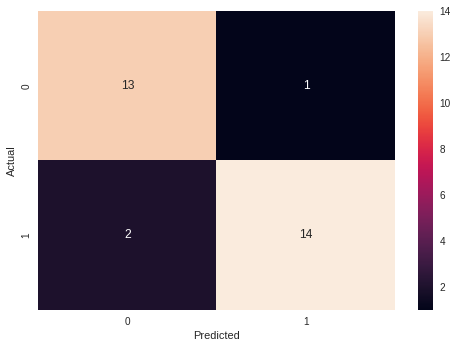

In [ ]:
confusion_matrix_bh = pd.crosstab(results_blendhard['condition'], results_blendhard['Label'], rownames=['Actual'],colnames=['Predicted'])  #, margins=True)
sns.heatmap(confusion_matrix_bh, annot=True)
plt.show()